Statistics Part 2

Practical

1. Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and
interpret the results?

In [1]:
import scipy.stats as stats

def z_test_sample_mean(sample_mean, population_mean, population_std, sample_size):
  """
  Performs a one-sample Z-test.

  Args:
    sample_mean: Sample mean.
    population_mean: Population mean.
    population_std: Population standard deviation.
    sample_size: Sample size.

  Returns:
    z_statistic: Calculated Z-statistic.
    p_value: P-value of the test.
  """
  z_statistic = (sample_mean - population_mean) / (population_std / (sample_size ** 0.5))
  p_value = stats.norm.sf(abs(z_statistic)) * 2  # Two-tailed test

  return z_statistic, p_value

# Example usage
sample_mean = 102
population_mean = 100
population_std = 15
sample_size = 50

z_stat, p_value = z_test_sample_mean(sample_mean, population_mean, population_std, sample_size)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
  print("Reject the null hypothesis. There is evidence that the sample mean is significantly different from the population mean.")
else:
  print("Fail to reject the null hypothesis. There is no evidence that the sample mean is significantly different from the population mean.")

Z-statistic: 0.9428090415820635
P-value: 0.3457785861511603
Fail to reject the null hypothesis. There is no evidence that the sample mean is significantly different from the population mean.


2. Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python?

In [2]:
import numpy as np
import scipy.stats as stats

def simulate_and_test(population_mean, population_std, sample_size, num_simulations, alpha):
  """
  Simulates data, performs hypothesis testing, and calculates P-values.

  Args:
    population_mean: Population mean.
    population_std: Population standard deviation.
    sample_size: Sample size.
    num_simulations: Number of simulations to run.
    alpha: Significance level.

  Returns:
    p_values: List of P-values from each simulation.
  """
  p_values = []
  for _ in range(num_simulations):
    sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)
    sample_mean = np.mean(sample)
    z_statistic = (sample_mean - population_mean) / (population_std / (sample_size ** 0.5))
    p_value = stats.norm.sf(abs(z_statistic)) * 2  # Two-tailed test
    p_values.append(p_value)

  return p_values

# Example usage
population_mean = 50
population_std = 10
sample_size = 30
num_simulations = 1000
alpha = 0.05

p_values = simulate_and_test(population_mean, population_std, sample_size, num_simulations, alpha)

# Analyze the results (e.g., calculate the proportion of P-values below alpha)
num_rejections = sum(p <= alpha for p in p_values)
rejection_rate = num_rejections / num_simulations
print(f"Rejection rate: {rejection_rate}")

Rejection rate: 0.043


3. Implement a one-sample Z-test using Python to compare the sample mean with the population mean.

In [3]:
import scipy.stats as stats

def z_test_sample_mean(sample_mean, population_mean, population_std, sample_size):
  """
  Performs a one-sample Z-test.

  Args:
    sample_mean: Sample mean.
    population_mean: Population mean.
    population_std: Population standard deviation.
    sample_size: Sample size.

  Returns:
    z_statistic: Calculated Z-statistic.
    p_value: P-value of the test.
  """
  z_statistic = (sample_mean - population_mean) / (population_std / (sample_size ** 0.5))
  p_value = stats.norm.sf(abs(z_statistic)) * 2  # Two-tailed test

  return z_statistic, p_value

# Example usage
sample_mean = 102
population_mean = 100
population_std = 15
sample_size = 50

z_stat, p_value = z_test_sample_mean(sample_mean, population_mean, population_std, sample_size)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
  print("Reject the null hypothesis. There is evidence that the sample mean is significantly different from the population mean.")
else:
  print("Fail to reject the null hypothesis. There is no evidence that the sample mean is significantly different from the population mean.")

Z-statistic: 0.9428090415820635
P-value: 0.3457785861511603
Fail to reject the null hypothesis. There is no evidence that the sample mean is significantly different from the population mean.


4. Perform a two-tailed Z-test using Python and visualize the decision region on a plot.

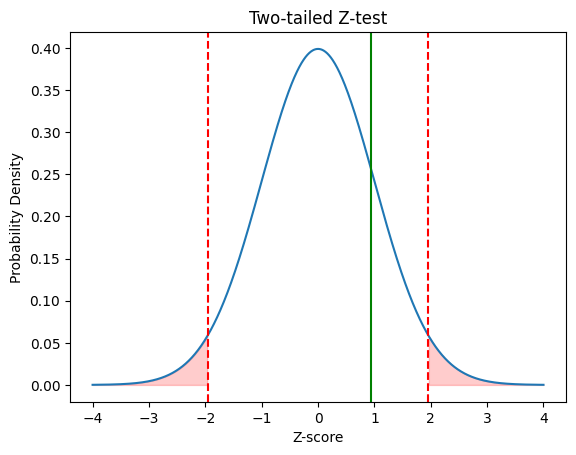

In [4]:
import matplotlib.pyplot as plt

# ... (Code from task 1 for z_test_sample_mean) ...

# Example usage
# ... (Same as in task 1) ...

# Visualize the decision region
z_critical = stats.norm.ppf(1 - alpha / 2)  # Critical value for two-tailed test
x = np.linspace(-4, 4, 1000)
plt.plot(x, stats.norm.pdf(x))
plt.axvline(x=z_critical, color='red', linestyle='--')
plt.axvline(x=-z_critical, color='red', linestyle='--')
plt.axvline(x=z_stat, color='green', linestyle='-')
plt.fill_between(x, 0, stats.norm.pdf(x), where=(x > z_critical), color='red', alpha=0.2)
plt.fill_between(x, 0, stats.norm.pdf(x), where=(x < -z_critical), color='red', alpha=0.2)
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.title('Two-tailed Z-test')
plt.show()

5.  Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing.

In [5]:
import numpy as np
import scipy.stats as stats

def simulate_type_errors(population_mean, population_std, sample_size, alpha, true_mean_shift=0, num_simulations=1000):
  """
  Simulates Type 1 and Type 2 errors.

  Args:
    population_mean: Population mean under the null hypothesis.
    population_std: Population standard deviation.
    sample_size: Sample size.
    alpha: Significance level.
    true_mean_shift: The true difference in means (for Type 2 error simulation).
    num_simulations: Number of simulations to run.

  Returns:
    type_1_error_rate: Estimated Type 1 error rate.
    type_2_error_rate: Estimated Type 2 error rate.
  """
  type_1_errors = 0
  type_2_errors = 0

  # Simulate Type 1 errors
  for _ in range(num_simulations):
    sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)
    sample_mean = np.mean(sample)
    z_statistic = (sample_mean - population_mean) / (population_std / (sample_size ** 0.5))
    p_value = stats.norm.sf(abs(z_statistic)) * 2
    if p_value <= alpha:
      type_1_errors += 1

  # Simulate Type 2 errors
  for _ in range(num_simulations):
    sample = np.random.normal(loc=population_mean + true_mean_shift, scale=population_std, size=sample_size)
    sample_mean = np.mean(sample)
    z_statistic = (sample_mean - population_mean) / (population_std / (sample_size ** 0.5))
    p_value = stats.norm.sf(abs(z_statistic)) * 2
    if p_value > alpha:
      type_2_errors += 1

  type_1_error_rate = type_1_errors / num_simulations
  type_2_error_rate = type_2_errors / num_simulations

  return type_1_error_rate, type_2_error_rate

# Example usage
population_mean = 50
population_std = 10
sample_size = 30
alpha = 0.05
true_mean_shift = 5

type_1_error, type_2_error = simulate_type_errors(population_mean, population_std, sample_size, alpha, true_mean_shift)
print(f"Estimated Type 1 error rate: {type_1_error}")
print(f"Estimated Type 2 error rate: {type_2_error}")

Estimated Type 1 error rate: 0.048
Estimated Type 2 error rate: 0.219


6.  Write a Python program to perform an independent T-test and interpret the results.

In [29]:
import scipy.stats as stats

def independent_t_test(sample1, sample2, alpha=0.05):
  """
  Performs an independent two-sample T-test.

  Args:
    sample1: First sample data.
    sample2: Second sample data.
    alpha: Significance level (default: 0.05).

  Returns:
    t_statistic: Calculated T-statistic.
    p_value: P-value of the test.

  Prints:
    The calculated T-statistic and p-value.
    Interpretation of the results based on the p-value and significance level.
  """
  t_statistic, p_value = stats.ttest_ind(sample1, sample2)

  print(f"T-statistic: {t_statistic:.4f}")
  print(f"P-value: {p_value:.4f}")

  if p_value < alpha:
    print(f"Reject the null hypothesis. There is evidence that the means of the two samples are significantly different at the {alpha*100:.0f}% significance level.")
  else:
    print(f"Fail to reject the null hypothesis. There is no evidence that the means of the two samples are significantly different at the {alpha*100:.0f}% significance level.")

# Example usage
sample1 = [10, 12, 15, 18, 20]
sample2 = [8, 10, 11, 13, 14]

independent_t_test(sample1, sample2)

T-statistic: 1.7834
P-value: 0.1124
Fail to reject the null hypothesis. There is no evidence that the means of the two samples are significantly different at the 5% significance level.


7.  Perform a paired sample T-test using Python and visualize the comparison results.

T-statistic: -5.999999999999999
P-value: 0.003882537046960512


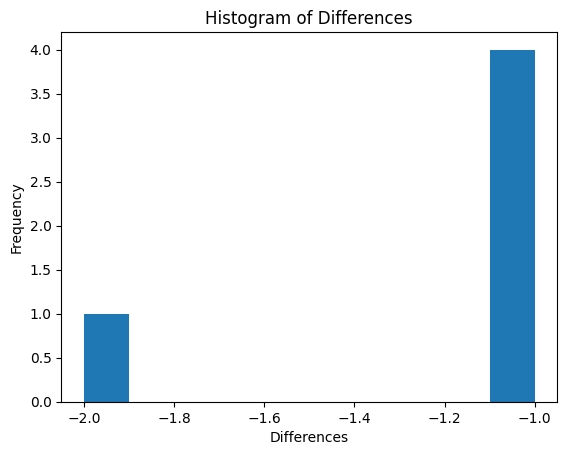

In [7]:
import scipy.stats as stats
import matplotlib.pyplot as plt

def paired_t_test(sample1, sample2):
  """
  Performs a paired sample T-test.

  Args:
    sample1: First sample.
    sample2: Second sample (paired with sample1).

  Returns:
    t_statistic: Calculated T-statistic.
    p_value: P-value of the test.
  """
  t_statistic, p_value = stats.ttest_rel(sample1, sample2)
  return t_statistic, p_value

# Example usage
sample1 = [10, 12, 15, 18, 20]
sample2 = [11, 13, 16, 19, 22]

t_stat, p_value = paired_t_test(sample1, sample2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Visualize the differences
differences = np.array(sample1) - np.array(sample2)
plt.hist(differences, bins=10)
plt.xlabel('Differences')
plt.ylabel('Frequency')
plt.title('Histogram of Differences')
plt.show()

8. Simulate data and perform both Z-test and T-test, then compare the results using Python.

In [8]:
import numpy as np
import scipy.stats as stats

def compare_z_t_tests(population_mean, population_std, sample_size, num_simulations, alpha):
  """
  Simulates data and compares Z-test and T-test results.

  Args:
    population_mean: Population mean.
    population_std: Population standard deviation.
    sample_size: Sample size.
    num_simulations: Number of simulations to run.
    alpha: Significance level.

  Returns:
    z_test_rejections: Number of rejections by Z-test.
    t_test_rejections: Number of rejections by T-test.
  """
  z_test_rejections = 0
  t_test_rejections = 0

  for _ in range(num_simulations):
    sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)  # Sample standard deviation

    # Z-test (assuming population standard deviation is known)
    z_statistic = (sample_mean - population_mean) / (population_std / (sample_size ** 0.5))
    z_p_value = stats.norm.sf(abs(z_statistic)) * 2
    if z_p_value <= alpha:
      z_test_rejections += 1

    # T-test (assuming population standard deviation is unknown)
    t_statistic = (sample_mean - population_mean) / (sample_std / (sample_size ** 0.5))
    t_p_value = stats.t.sf(abs(t_statistic), df=sample_size - 1) * 2
    if t_p_value <= alpha:
      t_test_rejections += 1

  return z_test_rejections, t_test_rejections

# Example usage
population_mean = 50
population_std = 10
sample_size = 20
num_simulations = 1000
alpha = 0.05

z_rejections, t_rejections = compare_z_t_tests(population_mean, population_std, sample_size, num_simulations, alpha)

print(f"Z-test rejections: {z_rejections}")
print(f"T-test rejections: {t_rejections}")

Z-test rejections: 63
T-test rejections: 55


9.  Write a Python function to calculate the confidence interval for a sample mean and explain its significance.

In [9]:
import scipy.stats as stats

def confidence_interval(sample, confidence_level=0.95):
  """
  Calculates the confidence interval for a sample mean.

  Args:
    sample: Sample data.
    confidence_level: Desired confidence level (default: 0.95).

  Returns:
    lower_bound: Lower bound of the confidence interval.
    upper_bound: Upper bound of the confidence interval.
  """
  sample_mean = np.mean(sample)
  sample_std = np.std(sample, ddof=1)  # Sample standard deviation
  n = len(sample)
  t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n - 1)
  margin_of_error = t_critical * (sample_std / np.sqrt(n))
  lower_bound = sample_mean - margin_of_error
  upper_bound = sample_mean + margin_of_error

  return lower_bound, upper_bound

# Example usage
sample = [10, 12, 15, 18, 20]
confidence_level = 0.95

lower, upper = confidence_interval(sample, confidence_level)
print(f"Confidence interval: ({lower:.2f}, {upper:.2f})")

Confidence interval: (9.88, 20.12)


10. Write a Python program to calculate the margin of error for a given confidence level using sample data.

In [10]:
import scipy.stats as stats

def margin_of_error(sample, confidence_level=0.95):
  """
  Calculates the margin of error for a given confidence level.

  Args:
    sample: Sample data.
    confidence_level: Desired confidence level (default: 0.95).

  Returns:
    margin_of_error: Margin of error.
  """
  sample_std = np.std(sample, ddof=1)  # Sample standard deviation
  n = len(sample)
  t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n - 1)
  margin_of_error = t_critical * (sample_std / np.sqrt(n))
  return margin_of_error

# Example usage
sample = [10, 12, 15, 18, 20]
confidence_level = 0.95

margin_error = margin_of_error(sample, confidence_level)
print(f"Margin of error: {margin_error:.2f}")

Margin of error: 5.12


11. Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process.

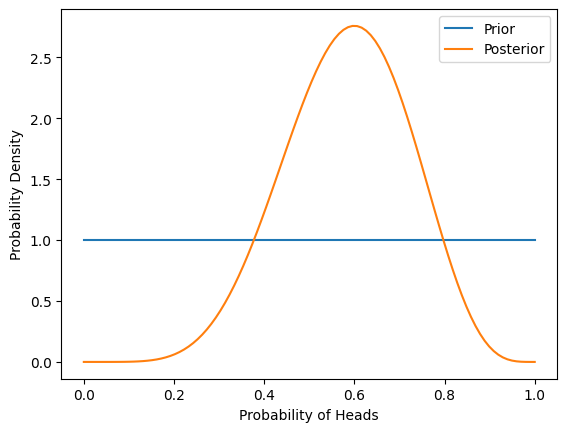

Prior: Beta(1, 1)
Posterior: Beta(7, 5)


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def bayesian_inference(prior_alpha, prior_beta, successes, trials):
  """
  Performs Bayesian inference for the probability of success in a binomial experiment.

  Args:
    prior_alpha: Alpha parameter of the Beta prior distribution.
    prior_beta: Beta parameter of the Beta prior distribution.
    successes: Number of successes observed in the data.
    trials: Total number of trials.

  Returns:
    posterior_alpha: Alpha parameter of the Beta posterior distribution.
    posterior_beta: Beta parameter of the Beta posterior distribution.
  """
  posterior_alpha = prior_alpha + successes
  posterior_beta = prior_beta + (trials - successes)
  return posterior_alpha, posterior_beta

# Example Usage
# Prior belief: Assume a fair coin (prior_alpha = 1, prior_beta = 1)
prior_alpha = 1
prior_beta = 1

# Observed data: 10 coin flips, 6 heads
successes = 6
trials = 10

# Perform Bayesian inference
posterior_alpha, posterior_beta = bayesian_inference(prior_alpha, prior_beta, successes, trials)

# Visualize prior and posterior distributions
x = np.linspace(0, 1, 100)
prior_dist = beta.pdf(x, prior_alpha, prior_beta)
posterior_dist = beta.pdf(x, posterior_alpha, posterior_beta)

plt.plot(x, prior_dist, label='Prior')
plt.plot(x, posterior_dist, label='Posterior')
plt.xlabel('Probability of Heads')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

print(f"Prior: Beta({prior_alpha}, {prior_beta})")
print(f"Posterior: Beta({posterior_alpha}, {posterior_beta})")

12. Perform a Chi-square test for independence between two categorical variables in Python.

In [13]:
import pandas as pd
from scipy.stats import chi2_contingency

def chi_square_test_independence(data, variable1, variable2, alpha=0.05):
  """
  Performs a Chi-square test of independence between two categorical variables.

  Args:
    data: Pandas DataFrame containing the data.
    variable1: Name of the first categorical variable.
    variable2: Name of the second categorical variable.
    alpha: Significance level (default: 0.05).

  Prints:
    Chi-square statistic, p-value, degrees of freedom, and expected frequencies.
    Interpretation of the results based on the p-value and significance level.

  Returns:
    chi2_stat: Chi-square statistic.
    p_value: P-value of the test.
    dof: Degrees of freedom.
    expected: Expected frequencies.
  """
  contingency_table = pd.crosstab(data[variable1], data[variable2])
  chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

  print("Chi-square Statistic:", chi2_stat)
  print("P-value:", p_value)
  print("Degrees of Freedom:", dof)
  print("Expected Frequencies:\n", expected)

  if p_value < alpha:
    print(f"Reject the null hypothesis. There is evidence of a significant association between {variable1} and {variable2} at the {alpha*100:.0f}% significance level.")
  else:
    print(f"Fail to reject the null hypothesis. There is no evidence of a significant association between {variable1} and {variable2} at the {alpha*100:.0f}% significance level.")

  return chi2_stat, p_value, dof, expected

# Example Usage
# Sample data (replace with your actual data)
data = {'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
        'Education': ['High School', 'Bachelor', 'Bachelor', 'High School', 'Master', 'PhD', 'High School', 'Bachelor']}
df = pd.DataFrame(data)

# Perform the Chi-square test
chi2_stat, p_value, dof, expected = chi_square_test_independence(df, 'Gender', 'Education')

Chi-square Statistic: 2.6666666666666665
P-value: 0.4459216983631228
Degrees of Freedom: 3
Expected Frequencies:
 [[1.5 1.5 0.5 0.5]
 [1.5 1.5 0.5 0.5]]
Fail to reject the null hypothesis. There is no evidence of a significant association between Gender and Education at the 5% significance level.


13. Write a Python program to calculate the expected frequencies for a Chi-square test based on observed
data.

In [9]:
import numpy as np

def calculate_expected_frequencies(observed_table):
  """
  Calculates the expected frequencies for a Chi-square test.

  Args:
    observed_table: 2D array representing the observed frequencies.

  Returns:
    expected_table: 2D array representing the expected frequencies.
  """
  row_sums = np.sum(observed_table, axis=1)
  col_sums = np.sum(observed_table, axis=0)
  total_sum = np.sum(observed_table)
  expected_table = np.outer(row_sums, col_sums) / total_sum
  return expected_table

# Example usage
observed_table = np.array([[20, 30], [15, 25]])
expected_table = calculate_expected_frequencies(observed_table)
print(expected_table)

[[19.44444444 30.55555556]
 [15.55555556 24.44444444]]


14. Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution.

In [6]:
import scipy.stats as stats
import numpy as np

def chi_square_goodness_of_fit(observed_frequencies, expected_probabilities, alpha=0.05):
  """
  Performs a Chi-Square goodness-of-fit test.

  Args:
    observed_frequencies: An array of observed frequencies.
    expected_probabilities: An array of expected probabilities for each category.
    alpha: Significance level (default: 0.05).

  Returns:
    chi2_stat: Chi-square statistic.
    p_value: P-value of the test.

  Raises:
    ValueError: If any expected frequencies are less than 5.

  Prints:
    The Chi-square statistic and p-value.
    Interpretation of the results based on the p-value and significance level.
    Warning if any expected frequencies are less than 5.
  """
  total_observations = sum(observed_frequencies)
  expected_frequencies = np.array(expected_probabilities) * total_observations

  # Check for expected frequencies less than 5
  if any(expected_frequencies < 5):
    print("Warning: Some expected frequencies are less than 5. Chi-square test results may not be reliable.")

  chi2_stat, p_value = stats.chisquare(observed_frequencies, f_exp=expected_frequencies)

  print(f"Chi-square statistic: {chi2_stat:.4f}")
  print(f"P-value: {p_value:.4f}")

  if p_value < alpha:
    print(f"Reject the null hypothesis. Observed frequencies do not fit the expected distribution at the {alpha*100:.0f}% significance level.")
  else:
    print(f"Fail to reject the null hypothesis. Observed frequencies may fit the expected distribution at the {alpha*100:.0f}% significance level.")

  return chi2_stat, p_value

# Example usage: Simulate data from a uniform distribution
num_categories = 4
total_observations = 100
expected_probabilities = np.full(num_categories, 1/num_categories)  # Uniform distribution

# Simulate observed frequencies
observed_frequencies = np.random.multinomial(total_observations, expected_probabilities)

# Perform the Chi-square test
chi2_stat, p_value = chi_square_goodness_of_fit(observed_frequencies, expected_probabilities)

Chi-square statistic: 0.4800
P-value: 0.9233
Fail to reject the null hypothesis. Observed frequencies may fit the expected distribution at the 5% significance level.


15. Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics.

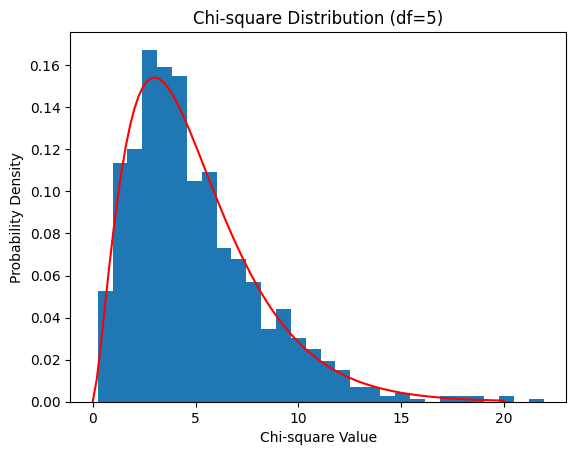

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def simulate_chi_square(df, num_samples=1000):
  """
  Simulates random samples from a Chi-square distribution.

  Args:
    df: Degrees of freedom.
    num_samples: Number of samples to simulate.

  Returns:
    samples: Array of simulated Chi-square values.
  """
  samples = np.random.chisquare(df, size=num_samples)
  return samples

# Example usage
df = 5
num_samples = 1000

chi_square_samples = simulate_chi_square(df, num_samples)

# Visualize
plt.hist(chi_square_samples, bins=30, density=True)
x = np.linspace(0, 20, 100)
plt.plot(x, stats.chi2.pdf(x, df), color='red')
plt.xlabel('Chi-square Value')
plt.ylabel('Probability Density')
plt.title(f'Chi-square Distribution (df={df})')
plt.show()

16. Implement an F-test using Python to compare the variances of two random samples.

In [16]:
import scipy.stats as stats

def f_test_variances(sample1, sample2):
  """
  Performs an F-test to compare the variances of two samples.

  Args:
    sample1: First sample.
    sample2: Second sample.

  Returns:
    f_statistic: F-statistic.
    p_value: P-value of the test.
  """
  f_statistic, p_value = stats.f_oneway(sample1, sample2)
  return f_statistic, p_value

# Example usage
sample1 = [10, 12, 15, 18, 20]
sample2 = [8, 10, 11, 13, 14]

f_stat, p_value = f_test_variances(sample1, sample2)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 3.1806167400881047
P-value: 0.11236112337282168


17. Write a Python program to perform an ANOVA test to compare means between multiple groups and
interpret the results.

In [17]:
import scipy.stats as stats

def one_way_anova(groups):
  """
  Performs a one-way ANOVA test.

  Args:
    groups: List of groups (each group is a list of values).

  Returns:
    f_statistic: F-statistic.
    p_value: P-value of the test.
  """
  f_statistic, p_value = stats.f_oneway(*groups)
  return f_statistic, p_value

# Example usage
group1 = [10, 12, 15, 18, 20]
group2 = [8, 10, 11, 13, 14]
group3 = [15, 17, 19, 21, 23]

f_stat, p_value = one_way_anova([group1, group2, group3])
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 6.978593272171254
P-value: 0.009762066614805122


18. Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results.

F-statistic: 6.9786
P-value: 0.0098
Reject the null hypothesis. There is evidence that at least one group mean is significantly different from the others.


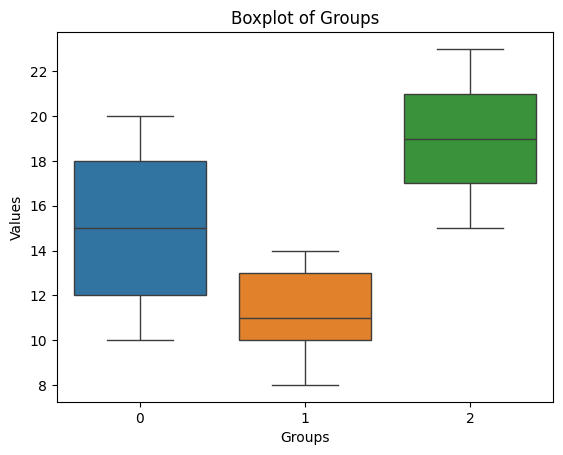

In [34]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

def one_way_anova(groups):
  """
  Performs a one-way ANOVA test.

  Args:
    groups: A list of lists, where each sublist represents a group of data.

  Returns:
    f_statistic: The F-statistic.
    p_value: The p-value of the test.

  Prints:
    The F-statistic and p-value.
    Interpretation of the results based on the p-value and significance level.
  """
  f_statistic, p_value = stats.f_oneway(*groups)
  print(f"F-statistic: {f_statistic:.4f}")
  print(f"P-value: {p_value:.4f}")

  if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence that at least one group mean is significantly different from the others.")
  else:
    print("Fail to reject the null hypothesis. There is no evidence that the group means are significantly different.")

  return f_statistic, p_value

# Example usage
group1 = [10, 12, 15, 18, 20]
group2 = [8, 10, 11, 13, 14]
group3 = [15, 17, 19, 21, 23]

f_stat, p_value = one_way_anova([group1, group2, group3])

# Create a boxplot to visualize group differences
sns.boxplot(data=[group1, group2, group3])
plt.xlabel("Groups")
plt.ylabel("Values")
plt.title("Boxplot of Groups")
plt.show()

19. Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA.


Normality Tests:
Group 1: Data appears normally distributed (Shapiro-Wilk W=0.964, p=0.832)
Group 2: Data appears normally distributed (Shapiro-Wilk W=0.974, p=0.899)
Group 3: Data appears normally distributed (Shapiro-Wilk W=0.987, p=0.967)

Levene's Test for Homogeneity of Variances: Variances appear equal (Levene statistic=0.851, p=0.451)


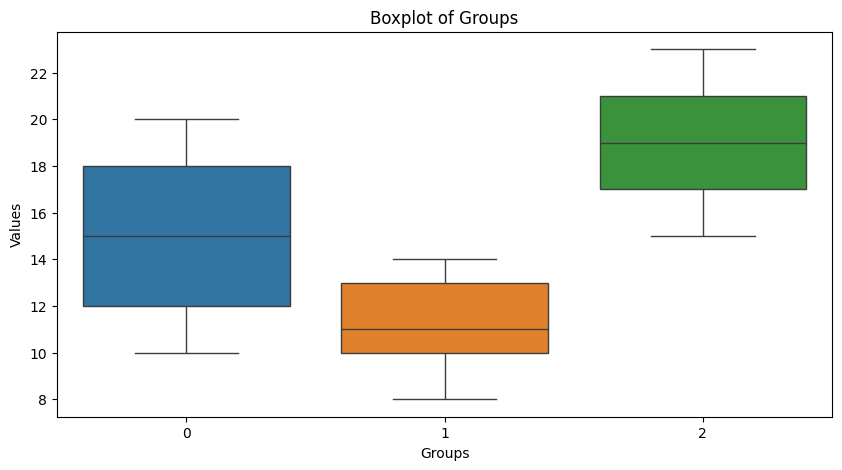

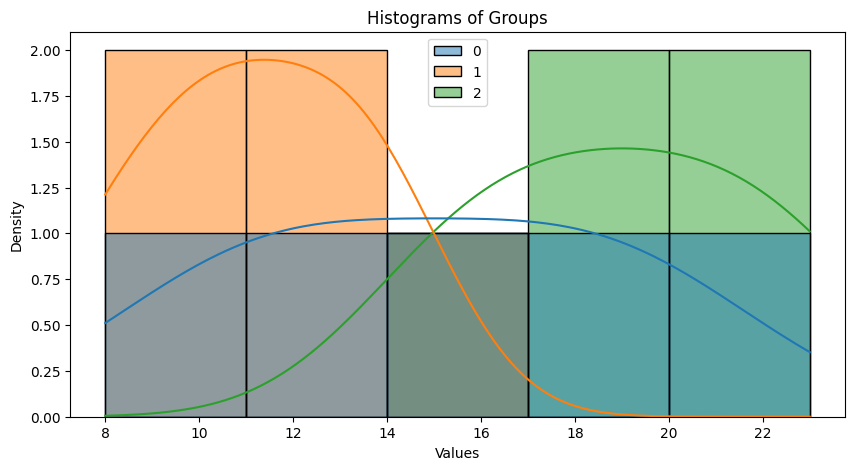

In [12]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

def check_anova_assumptions(groups, alpha=0.05):
  """
  Checks the assumptions for ANOVA: normality and homogeneity of variances.

  Args:
    groups: List of groups (each group is a list of values).
    alpha: Significance level for normality and homogeneity tests (default: 0.05).

  Prints:
    Results of the normality tests for each group.
    Results of the Levene's test for homogeneity of variances.
    Displays boxplots and histograms for visualizing the data.

  Notes:
    - Independence of observations is not directly tested by this function.
      It needs to be assessed based on the experimental design.
  """

  # Check normality
  print("\nNormality Tests:")
  for i, group in enumerate(groups):
    stat, p_value = stats.shapiro(group)
    if p_value > alpha:
      print(f"Group {i+1}: Data appears normally distributed (Shapiro-Wilk W={stat:.3f}, p={p_value:.3f})")
    else:
      print(f"Group {i+1}: Data may not be normally distributed (Shapiro-Wilk W={stat:.3f}, p={p_value:.3f})")

  # Check homogeneity of variances
  stat, p_value = stats.levene(*groups)
  if p_value > alpha:
    print(f"\nLevene's Test for Homogeneity of Variances: Variances appear equal (Levene statistic={stat:.3f}, p={p_value:.3f})")
  else:
    print(f"\nLevene's Test for Homogeneity of Variances: Variances may not be equal (Levene statistic={stat:.3f}, p={p_value:.3f})")

  # Visualizations
  plt.figure(figsize=(10, 5))
  sns.boxplot(data=groups)
  plt.xlabel("Groups")
  plt.ylabel("Values")
  plt.title("Boxplot of Groups")

  plt.figure(figsize=(10, 5))
  sns.histplot(data=groups, kde=True)
  plt.xlabel("Values")
  plt.ylabel("Density")
  plt.title("Histograms of Groups")
  plt.show()

# Example Usage (assuming you have data for multiple groups)
group1 = [10, 12, 15, 18, 20]
group2 = [8, 10, 11, 13, 14]
group3 = [15, 17, 19, 21, 23]
groups = [group1, group2, group3]

check_anova_assumptions(groups)

20.  Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the
results.

                           sum_sq   df         F    PR(>F)
C(factor1)               1.333333  1.0  0.096970  0.763457
C(factor2)              27.000000  1.0  1.963636  0.198705
C(factor1):C(factor2)    8.333333  1.0  0.606061  0.458680
Residual               110.000000  8.0       NaN       NaN


<ipython-input-1-9f4c77a9809a>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-1-9f4c77a9809a>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][1] < 0.05:
<ipython-input-1-9f4c77a9809a>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][2] < 0.05:


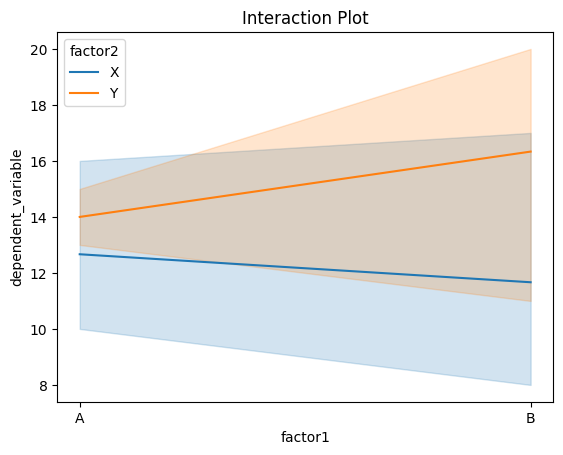

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

def two_way_anova(data, factor1, factor2, dependent_variable):
  """
  Performs a two-way ANOVA test.

  Args:
    data: DataFrame containing the data.
    factor1: Name of the first factor variable.
    factor2: Name of the second factor variable.
    dependent_variable: Name of the dependent variable.

  Returns:
    anova_table: ANOVA table.

  Prints:
    The ANOVA table.
    Interpretation of the results.
  """
  model = ols(f'{dependent_variable} ~ C({factor1}) + C({factor2}) + C({factor1}):C({factor2})', data=data).fit()
  anova_table = sm.stats.anova_lm(model, typ=2)
  print(anova_table)

  # Interpretation
  if anova_table['PR(>F)'][0] < 0.05:
    print(f"Main effect of {factor1} is significant.")
  if anova_table['PR(>F)'][1] < 0.05:
    print(f"Main effect of {factor2} is significant.")
  if anova_table['PR(>F)'][2] < 0.05:
    print(f"Interaction effect between {factor1} and {factor2} is significant.")

  return anova_table

# Example Usage
# Create sample data (replace with your actual data)
data = {'factor1': ['A', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B'],
        'factor2': ['X', 'X', 'Y', 'X', 'X', 'Y', 'Y', 'Y', 'X', 'Y', 'Y', 'X'],
        'dependent_variable': [10, 12, 15, 8, 10, 11, 13, 14, 16, 18, 20, 17]}
df = pd.DataFrame(data)

# Perform two-way ANOVA
anova_table = two_way_anova(df, 'factor1', 'factor2', 'dependent_variable')

# Create an interaction plot
sns.lineplot(x='factor1', y='dependent_variable', hue='factor2', data=df)
plt.title("Interaction Plot")
plt.show()

21. Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing.

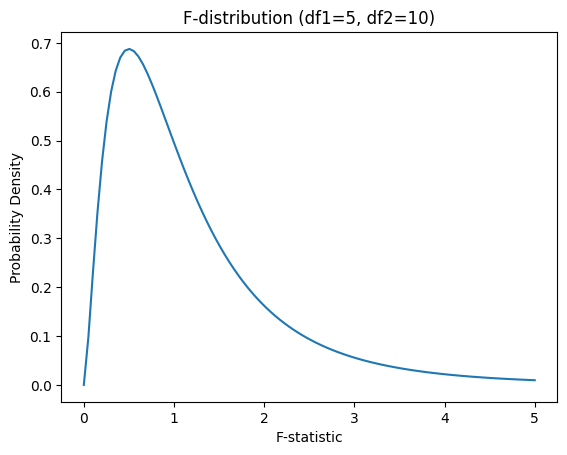

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def visualize_f_distribution(df1, df2):
  """
  Visualizes the F-distribution.

  Args:
    df1: Degrees of freedom for the numerator.
    df2: Degrees of freedom for the denominator.
  """
  x = np.linspace(0, 5, 100)
  plt.plot(x, stats.f.pdf(x, df1, df2))
  plt.xlabel('F-statistic')
  plt.ylabel('Probability Density')
  plt.title(f'F-distribution (df1={df1}, df2={df2})')
  plt.show()

# Example usage
df1 = 5
df2 = 10
visualize_f_distribution(df1, df2)

22. Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means.

F-statistic: 6.978593272171254
P-value: 0.009762066614805122


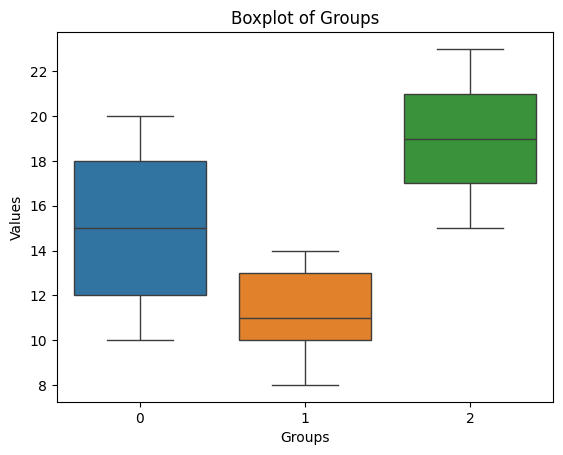

In [21]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

def one_way_anova(groups):
  """
  Performs a one-way ANOVA test.

  Args:
    groups: List of groups (each group is a list of values).

  Returns:
    f_statistic: F-statistic.
    p_value: P-value of the test.
  """
  f_statistic, p_value = stats.f_oneway(*groups)
  return f_statistic, p_value

# Example usage
group1 = [10, 12, 15, 18, 20]
group2 = [8, 10, 11, 13, 14]
group3 = [15, 17, 19, 21, 23]

f_stat, p_value = one_way_anova([group1, group2, group3])
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Visualize with boxplots
sns.boxplot(data=[group1, group2, group3])
plt.xlabel('Groups')
plt.ylabel('Values')
plt.title('Boxplot of Groups')
plt.show()

23. Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means.

In [22]:
import numpy as np
import scipy.stats as stats

def simulate_and_test_normal(population_mean, population_std, sample_size, alpha):
  """
  Simulates data from a normal distribution and performs a one-sample t-test.

  Args:
    population_mean: Population mean.
    population_std: Population standard deviation.
    sample_size: Sample size.
    alpha: Significance level.

  Returns:
    t_statistic: Calculated T-statistic.
    p_value: P-value of the test.
  """
  sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)
  sample_mean = np.mean(sample)
  t_statistic, p_value = stats.ttest_1samp(sample, popmean=population_mean)
  return t_statistic, p_value

# Example usage
population_mean = 50
population_std = 10
sample_size = 30
alpha = 0.05

t_stat, p_value = simulate_and_test_normal(population_mean, population_std, sample_size, alpha)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < alpha:
  print("Reject the null hypothesis. There is evidence that the sample mean is significantly different from the population mean.")
else:
  print("Fail to reject the null hypothesis. There is no evidence that the sample mean is significantly different from the population mean.")

T-statistic: 1.2115798749999143
P-value: 0.23545346429588732
Fail to reject the null hypothesis. There is no evidence that the sample mean is significantly different from the population mean.


24.  Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results.

In [23]:
import scipy.stats as stats

def variance_test(sample, population_variance, alpha):
  """
  Performs a Chi-square test for population variance.

  Args:
    sample: Sample data.
    population_variance: Population variance.
    alpha: Significance level.

  Returns:
    chi2_stat: Chi-square statistic.
    p_value: P-value of the test.
  """
  n = len(sample)
  chi2_stat = ((n - 1) * np.var(sample)) / population_variance
  p_value = stats.chi2.sf(chi2_stat, df=n - 1)
  return chi2_stat, p_value

# Example usage
sample = [10, 12, 15, 18, 20]
population_variance = 25
alpha = 0.05

chi2_stat, p_value = variance_test(sample, population_variance, alpha)
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < alpha:
  print("Reject the null hypothesis. There is evidence that the population variance is different from the specified value.")
else:
  print("Fail to reject the null hypothesis. There is no evidence that the population variance is different from the specified value.")

Chi-square statistic: 2.176
P-value: 0.7034254839139511
Fail to reject the null hypothesis. There is no evidence that the population variance is different from the specified value.


25. Write a Python script to perform a Z-test for comparing proportions between two datasets or groups.

In [24]:
import scipy.stats as stats

def z_test_proportions(p1, n1, p2, n2):
  """
  Performs a Z-test for comparing two proportions.

  Args:
    p1: Proportion in the first group.
    n1: Sample size in the first group.
    p2: Proportion in the second group.
    n2: Sample size in the second group.

  Returns:
    z_statistic: Z-statistic.
    p_value: P-value of the test.
  """
  pooled_proportion = ((p1 * n1) + (p2 * n2)) / (n1 + n2)
  standard_error = np.sqrt(pooled_proportion * (1 - pooled_proportion) * (1/n1 + 1/n2))
  z_statistic = (p1 - p2) / standard_error
  p_value = stats.norm.sf(abs(z_statistic)) * 2  # Two-tailed test
  return z_statistic, p_value

# Example usage
p1 = 0.6
n1 = 100
p2 = 0.5
n2 = 120

z_stat, p_value = z_test_proportions(p1, n1, p2, n2)
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

Z-statistic: 1.4832396974191322
P-value: 0.1380107375686596


26. Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results.

In [25]:
import scipy.stats as stats

def f_test_variances(sample1, sample2):
  """
  Performs an F-test to compare the variances of two samples.

  Args:
    sample1: First sample.
    sample2: Second sample.

  Returns:
    f_statistic: F-statistic.
    p_value: P-value of the test.
  """
  f_statistic, p_value = stats.f_oneway(sample1, sample2)
  return f_statistic, p_value

# Example usage
sample1 = [10, 12, 15, 18, 20]
sample2 = [8, 10, 11, 13, 14]

f_stat, p_value = f_test_variances(sample1, sample2)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 3.1806167400881047
P-value: 0.11236112337282168


27. Perform a Chi-square test for goodness of fit with simulated data and analyze the results.

In [37]:
import numpy as np
import scipy.stats as stats

def chi_square_goodness_of_fit(observed_frequencies, expected_probabilities, alpha=0.05):
  """
  Performs a Chi-square goodness-of-fit test.

  Args:
    observed_frequencies: An array of observed frequencies.
    expected_probabilities: An array of expected probabilities for each category.
    alpha: Significance level (default: 0.05).

  Returns:
    chi2_stat: Chi-square statistic.
    p_value: P-value of the test.

  Prints:
    The Chi-square statistic and p-value.
    Interpretation of the results based on the p-value and significance level.
  """
  total_observations = sum(observed_frequencies)
  expected_frequencies = np.array(expected_probabilities) * total_observations

  chi2_stat, p_value = stats.chisquare(observed_frequencies, f_exp=expected_frequencies)

  print(f"Chi-square statistic: {chi2_stat:.4f}")
  print(f"P-value: {p_value:.4f}")

  if p_value < alpha:
    print(f"Reject the null hypothesis. Observed frequencies do not fit the expected distribution at the {alpha*100:.0f}% significance level.")
  else:
    print(f"Fail to reject the null hypothesis. Observed frequencies may fit the expected distribution at the {alpha*100:.0f}% significance level.")

  return chi2_stat, p_value

# Example usage: Simulate data from a uniform distribution
num_categories = 4
total_observations = 100
expected_probabilities = np.full(num_categories, 1/num_categories)  # Uniform distribution

# Simulate observed frequencies
observed_frequencies = np.random.multinomial(total_observations, expected_probabilities)

# Perform the Chi-square test
chi2_stat, p_value = chi_square_goodness_of_fit(observed_frequencies, expected_probabilities)

Chi-square statistic: 2.7200
P-value: 0.4368
Fail to reject the null hypothesis. Observed frequencies may fit the expected distribution at the 5% significance level.
